In [2]:
import os
import json


In [3]:
def collect_contract_occurrences(json_file_path, contract_name):
    try:
        with open(json_file_path, 'r') as file:
            data = json.load(file)
        
        occurrences = []
        index = 1
        
        for entry in data:
            if entry['contract'].startswith(contract_name):
                occurrences.append(f"{contract_name}-{index}")
                index += 1
        
        return occurrences
    
    except FileNotFoundError:
        return "The JSON file does not exist."
    except json.JSONDecodeError:
        return "Error decoding JSON file."
    except Exception as e:
        return f"An error occurred: {e}"

In [4]:
def list_files_in_directory(directory_path):
    try:
        # List all files in the directory
        files = os.listdir(directory_path)
        
        # Filter out directories, keep only files
        files = [f for f in files if os.path.isfile(os.path.join(directory_path, f))]
        
        return files
    except FileNotFoundError:
        return "The directory does not exist."
    except PermissionError:
        return "You do not have permission to access this directory."
    except Exception as e:
        return f"An error occurred: {e}"

In [5]:
directory_path = '../results/auction'
files = list_files_in_directory(directory_path)

In [6]:
failed_file_path = '../results/json/failed_exploits.json'
unresolved_file_path = '../results/json/unresolved_exploits.json'
contract_name = 'PrizeDistribution'

failed_occurrences = collect_contract_occurrences(failed_file_path, contract_name)
unresolved_occurrences = collect_contract_occurrences(unresolved_file_path, contract_name)

print(failed_occurrences.__len__())
print(unresolved_occurrences.__len__())

24
1


In [22]:
dir_address = '../results/partly-and-completely-exploitables'
list_of_party_and_completely_exploitables = list_files_in_directory(dir_address)
counts = dict()
for file in list_of_party_and_completely_exploitables:
    with open(dir_address+'/'+file, 'r') as file_object:
        length = len(file_object.readlines()) - 2
        if length in counts:
            counts[length] += 1
        else:
            counts[length] = 1

In [23]:
counts

{2: 12, 1: 15, 3: 5, 6: 1, 7: 1, 10: 1, 12: 1, 5: 1}

In [24]:
from pygments import highlight
from pygments.lexers import SolLexer  # Solidity Lexer
from pygments.formatters import HtmlFormatter

# Solidity code
code = """
contract Wallet {
    address payable public owner;
    mapping (address => uint256) balances;
    constructor() {
        owner = payable(msg.sender);
    }
    receive() external payable {}
    function deposit() external payable {
        require(msg.sender == owner, "caller is not owner");
    }
    function withdraw(uint256 _amount) external {
        require(msg.sender == owner, "caller is not owner");
        require(balances[msg.sender] > 0, "No balance");
        payable(msg.sender).transfer(_amount);
    }
}
"""

formatter = HtmlFormatter(full=True, style="colorful")
html_code = highlight(code, SolLexer(), formatter)

# Save HTML to file
with open("code.html", "w") as f:
    f.write(html_code)


ImportError: cannot import name 'SolLexer' from 'pygments.lexers' (/Users/mojtabaeshghie/opt/anaconda3/lib/python3.8/site-packages/pygments/lexers/__init__.py)

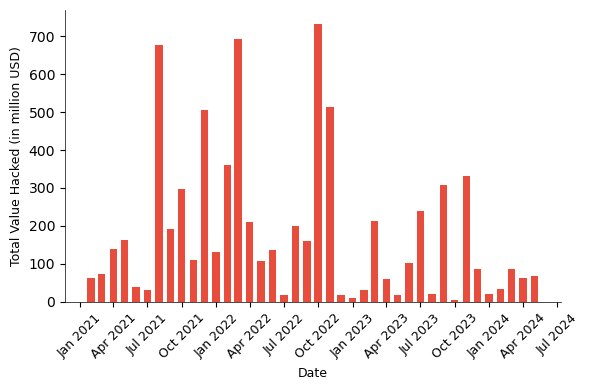

In [30]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd

# Data provided
data = {
    "Date": [
        "Feb 2021", "Mar 2021", "Apr 2021", "May 2021", "Jun 2021", "Jul 2021", "Aug 2021", "Sep 2021", "Oct 2021", "Nov 2021", "Dec 2021",
        "Jan 2022", "Feb 2022", "Mar 2022", "Apr 2022", "May 2022", "Jun 2022", "Jul 2022", "Aug 2022", "Sep 2022", "Oct 2022", "Nov 2022", "Dec 2022",
        "Jan 2023", "Feb 2023", "Mar 2023", "Apr 2023", "May 2023", "Jun 2023", "Jul 2023", "Aug 2023", "Sep 2023", "Oct 2023", "Nov 2023", "Dec 2023",
        "Jan 2024", "Feb 2024", "Mar 2024", "Apr 2024", "May 2024"
    ],
    "Total Value Hacked (USD)": [
        63.8, 72.2, 138.4, 163.98, 38.58, 31.96, 675.85, 191.55, 298, 108.9, 506.95,
        131.64, 359.9, 692.81, 210, 106.8, 135.5, 18.3, 200.78, 160.83, 732.8, 512.85, 18.86,
        8.63, 30.61, 213.58, 60.91, 16.62, 103.03, 238.42, 21.04, 308.23, 3.47, 331.25, 85.82,
        20.98, 32.85, 85.04, 63.11, 67.9
    ]
}

# Convert the date strings to datetime objects
data['Date'] = [datetime.strptime(date, "%b %Y") for date in data['Date']]

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting the data
fig, ax = plt.subplots(figsize=(6, 4), facecolor='white')


# Bar plot with adjusted width and color scheme
bars = ax.bar(df['Date'], df['Total Value Hacked (USD)'], color='#e74c3c', label='Total value stolen', width=20)

# Format the dates on the x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, fontsize=9)

# Add labels with increased font size
ax.set_xlabel('Date', fontsize=9)
ax.set_ylabel('Total Value Hacked (in million USD)', fontsize=9)

# Remove grid
ax.grid(False)

# Customize colors and styles to match the provided plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()

plt.tight_layout()

# Save the plot as SVG
output_path = "Monthly_Total_Value_Hacked_DeFi_Protocols_Poster_No_Title.svg"
plt.savefig(output_path, format="svg")
plt.show()


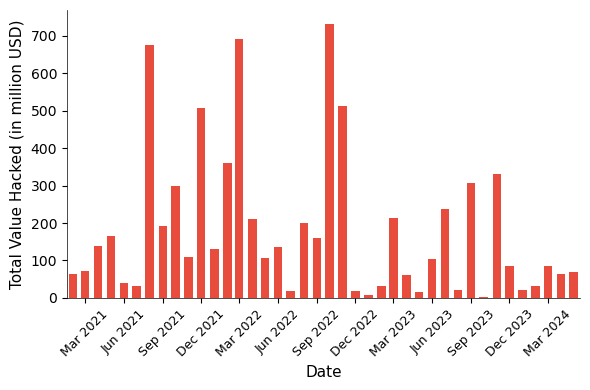

In [36]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd

# Data provided
data = {
    "Date": [
        "Feb 2021", "Mar 2021", "Apr 2021", "May 2021", "Jun 2021", "Jul 2021", "Aug 2021", "Sep 2021", "Oct 2021", "Nov 2021", "Dec 2021",
        "Jan 2022", "Feb 2022", "Mar 2022", "Apr 2022", "May 2022", "Jun 2022", "Jul 2022", "Aug 2022", "Sep 2022", "Oct 2022", "Nov 2022", "Dec 2022",
        "Jan 2023", "Feb 2023", "Mar 2023", "Apr 2023", "May 2023", "Jun 2023", "Jul 2023", "Aug 2023", "Sep 2023", "Oct 2023", "Nov 2023", "Dec 2023",
        "Jan 2024", "Feb 2024", "Mar 2024", "Apr 2024", "May 2024"
    ],
    "Total Value Hacked (USD)": [
        63.8, 72.2, 138.4, 163.98, 38.58, 31.96, 675.85, 191.55, 298, 108.9, 506.95,
        131.64, 359.9, 692.81, 210, 106.8, 135.5, 18.3, 200.78, 160.83, 732.8, 512.85, 18.86,
        8.63, 30.61, 213.58, 60.91, 16.62, 103.03, 238.42, 21.04, 308.23, 3.47, 331.25, 85.82,
        20.98, 32.85, 85.04, 63.11, 67.9
    ]
}

# Convert the date strings to datetime objects
data['Date'] = [datetime.strptime(date, "%b %Y") for date in data['Date']]

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting the data
fig, ax = plt.subplots(figsize=(6, 4), facecolor='white')

# Bar plot with adjusted width and color scheme
bars = ax.bar(df['Date'], df['Total Value Hacked (USD)'], color='#e74c3c', label='Total value stolen', width=20)

# Format the dates on the x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, fontsize=9)

# Set x-axis limits to avoid extra space
ax.set_xlim([df['Date'].min() - pd.DateOffset(days=15), df['Date'].max() + pd.DateOffset(days=15)])

# Add labels with increased font size
ax.set_xlabel('Date', fontsize=11)
ax.set_ylabel('Total Value Hacked (in million USD)', fontsize=11)

# Remove grid
ax.grid(False)

# Customize colors and styles to match the provided plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()

plt.tight_layout()

# Save the plot as SVG
output_path = "Monthly_Total_Value_Hacked_DeFi_Protocols_Poster_No_Title.pdf"
plt.savefig(output_path, format="pdf")
plt.show()


PDF file saved to Total_Value_Locked_TVL_Over_Time.pdf


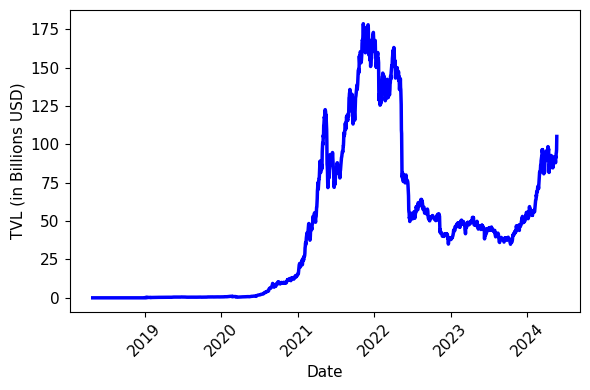

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'chain-dataset-All.csv'  # Replace with the path to your CSV file
df = pd.read_csv(file_path)

# Convert the date columns to datetime format
df = df.set_index('Protocol')
df.columns = pd.to_datetime(df.columns, format='%d/%m/%Y')

# Filter the 'Total' row which seems to represent the overall TVL
total_tvl = df.loc['Total'].dropna()

# Convert TVL to billions for conciseness
total_tvl_in_billion = total_tvl / 1e9

# Increase font sizes for labels and create the plot without title
fig, ax = plt.subplots(figsize=(6, 4), facecolor='white')
ax.plot(total_tvl_in_billion.index, total_tvl_in_billion.values, color='blue', linewidth=2.5)
ax.set_xlabel('Date', fontsize=11)
ax.set_ylabel('TVL (in Billions USD)', fontsize=11)
ax.tick_params(axis='x', rotation=45, labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.grid(False)
plt.tight_layout()

# Save the plot to a PDF file
pdf_file_path = 'Total_Value_Locked_TVL_Over_Time.pdf'
fig.savefig(pdf_file_path, format='pdf')

print(f"PDF file saved to {pdf_file_path}")


In [110]:
from datetime import datetime, timedelta
import pytz

def unix_to_iso_duration(block_timestamp):
    # Define the CEST timezone
    cest = pytz.timezone('utc')
    
    # Get the current time in CEST
    current_time = datetime.now(cest)
    print('current time (CEST): ' + str(current_time))
    print('current time (Unix timestamp): ' + str(current_time.timestamp()))
    current_unix_time = int(current_time.timestamp())
    
    # Calculate the time difference
    time_diff = block_timestamp - current_unix_time
    
    # Convert the time difference into a timedelta object
    duration = timedelta(seconds=time_diff)
    
    # Calculate the duration components
    days = duration.days
    seconds = duration.seconds
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = seconds % 60

    print('duration is: ' + str(hours))
    
    # Create the ISO 8601 duration string
    iso_duration = f"P{days}DT{hours}H{minutes}M{seconds}S"
    
    return iso_duration

block_timestamp = 1716552636
iso_duration = unix_to_iso_duration(block_timestamp)
print(f"ISO 8601 Duration: {iso_duration}")


current time (CEST): 2024-05-24 12:10:48.175669+00:00
current time (Unix timestamp): 1716552648.175669
duration is: 23
ISO 8601 Duration: P-1DT23H59M48S
